
<b>credit_cart_balance.csv</b>
    - Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
    - This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

<a id="top"></a>
- [Overview](#overview)
- [SK_ID_PREV](#sk-id-prev)
- [SK_ID_CURR](#sk-id-curr)
- [MONTHS_BALANCE](#months-balance)
- [AMT_BALANCE](#amt-balance)
- [AMT_CREDIT_LIMIT_ACTUAL](#amt-credit-limit-actual)
- [AMT_DRAWINGS_ATM_CURRENT](#amt-drawings-amt-current)
- [AMT_DRAWINGS_CURRENT](#amt-drawings-current)
- [AMT_DRAWINGS_OTHER_CURRENT](#amt-drawings-other-current)
- [AMT_DRAWINGS_POS_CURRENT](#amt-drawings-pos-current)
- [AMT_INST_MIN_REGULARITY](#amt-inst-min-regularity)
- [AMT_PAYMENT_CURRENT](#amt-payment-current)
- [AMT_PAYMENT_TOTAL_CURRENT](#amt-payment-total-current)
- [AMT_RECEIVABLE_PRINCIPAL](#amt-receivable-principal)
- [AMT_RECIVABLE](#amt-recivable)
- [AMT_TOTAL_RECEIVABLE](#amt-total-receivable)
- [CNT_DRAWINGS_ATM_CURRENT](#cnt-drawings-amt-current)
- [CNT_DRAWINGS_CURRENT](#cnt-drawings-current)
- [CNT_DRAWINGS_OTHER_CURRENT](#cnt-drawings-other-current)
- [CNT_DRAWINGS_POS_CURRENT](#cnt-drawings-pos-current)
- [CNT_INSTALMENT_MATURE_CUM](#cnt-instalment-mature-cum)
- [NAME_CONTRACT_STATUS](#name-contract-status)
- [SK_DPD](#sk-dpd)
- [SK_DPD_DEF](#sk-dpd-def)

## Prepare

In [7]:
import feather
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 999

ccb = feather.read_dataframe('../data/input/credit_card_balance.feather')
app_trn = feather.read_dataframe('../data/input/application_train.feather')
ccb = ccb.merge(app_trn[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='inner')

def target_bar(df, col, title=None):

    df0 = df[df["TARGET"] == 0]
    df1 = df[df["TARGET"] == 1]

    t0 = df0[col].value_counts().rename(col + '0')
    t1 = df1[col].value_counts().rename(col + '1')
    t = pd.concat([t0, t1], axis=1).fillna(0).astype(int)
    t['total'] = t.sum(axis=1)
    t.sort_values('total', inplace=True, ascending=False)
    t.drop(columns=['total'], inplace=True)

    idx = np.arange(len(t))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 6))

    p1 = ax.bar(idx, t[col + '0'], width)
    p2 = ax.bar(idx+width, t[col + '1'], width)
    ax.legend((p1[0], p2[0]), ('Target=0', 'Target=1'))
    ax.set_title(title)
    ax.set_xticks(idx + width / 2)
    ax.set_xticklabels(t.index.values, rotation=45)

    plt.show()
    
def target_hist(df, col, title):

    df0 = df[df["TARGET"] == 0]
    df1 = df[df["TARGET"] == 1]

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    sns.distplot(df0[col].dropna(), ax=axes[0], color='b')
    axes[0].set_title('Target=0')
    sns.distplot(df1[col].dropna(), ax=axes[1], color='orange')
    axes[1].set_title('Target=1')
    fig.suptitle(title)
    plt.show()

<a id="overview"></a>
## Overview

In [5]:
ccb.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [6]:
ccb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
SK_ID_PREV                    int64
SK_ID_CURR                    int64
MONTHS_BALANCE                int64
AMT_BALANCE                   float64
AMT_CREDIT_LIMIT_ACTUAL       int64
AMT_DRAWINGS_ATM_CURRENT      float64
AMT_DRAWINGS_CURRENT          float64
AMT_DRAWINGS_OTHER_CURRENT    float64
AMT_DRAWINGS_POS_CURRENT      float64
AMT_INST_MIN_REGULARITY       float64
AMT_PAYMENT_CURRENT           float64
AMT_PAYMENT_TOTAL_CURRENT     float64
AMT_RECEIVABLE_PRINCIPAL      float64
AMT_RECIVABLE                 float64
AMT_TOTAL_RECEIVABLE          float64
CNT_DRAWINGS_ATM_CURRENT      float64
CNT_DRAWINGS_CURRENT          int64
CNT_DRAWINGS_OTHER_CURRENT    float64
CNT_DRAWINGS_POS_CURRENT      float64
CNT_INSTALMENT_MATURE_CUM     float64
NAME_CONTRACT_STATUS          object
SK_DPD                        int64
SK_DPD_DEF                    int64
dtypes: float64(15), int64(7

<a id="sk-id-prev"></a>
## SK_ID_PREV

In [13]:
ccb.groupby('SK_ID_PREV').size().describe()

count    87452.000000
mean        36.911277
std         33.594983
min          1.000000
25%         10.000000
50%         21.000000
75%         75.000000
max         96.000000
dtype: float64

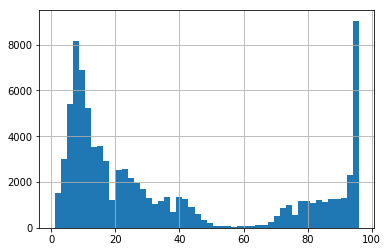

In [11]:
ccb.groupby('SK_ID_PREV').size().hist(bins=50)
plt.show()

In [14]:
96/12

8.0

maxが96なのは得られる過去データが8年間とかっていう理由からか？

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="sk-id-curr"></a>
## SK_ID_CURR

In [15]:
ccb.groupby('SK_ID_CURR').size().describe()

count    86905.000000
mean        37.143605
std         33.698512
min          1.000000
25%         10.000000
50%         22.000000
75%         75.000000
max        192.000000
dtype: float64

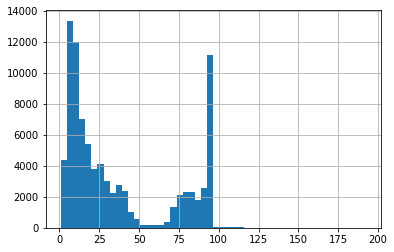

In [16]:
ccb.groupby('SK_ID_CURR').size().hist(bins=50)

In [19]:
cnt_sk_id_curr = ccb.groupby('SK_ID_CURR').size().rename('CCB_CNT_SK_ID_CURR').reset_index()
cnt_sk_id_curr = cnt_sk_id_curr.merge(app_trn[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='inner')

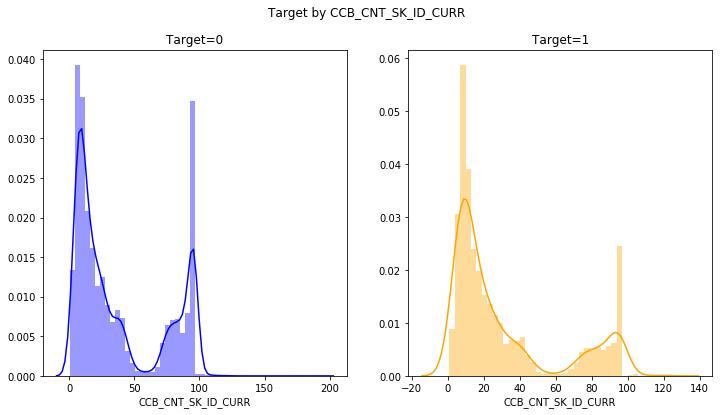

In [20]:
target_hist(cnt_sk_id_curr[['SK_ID_CURR', 'CCB_CNT_SK_ID_CURR', 'TARGET']], "CCB_CNT_SK_ID_CURR", "Target by CCB_CNT_SK_ID_CURR")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="months-balance"></a>
## MONTHS_BALANCE

description : Month of balance relative to application date (-1 means the freshest balance date)

SK_ID_CURRに対する相対的な月(-1が最新で古くなるほどマイナスが増える)

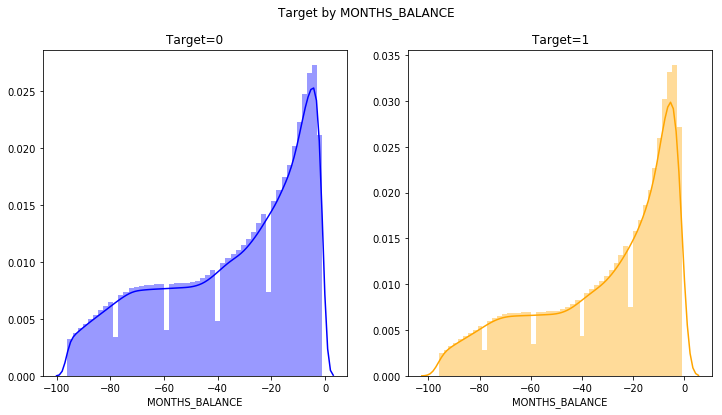

In [22]:
target_hist(ccb, "MONTHS_BALANCE", "Target by MONTHS_BALANCE")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="amt-balance"></a>
## AMT_BALANCE

description : Balance during the month of previous credit


In [23]:
ccb.AMT_BALANCE.describe()

count    3.227965e+06
mean     5.907332e+04
std      1.066137e+05
min     -4.202502e+05
25%      0.000000e+00
50%      0.000000e+00
75%      9.040554e+04
max      1.354829e+06
Name: AMT_BALANCE, dtype: float64

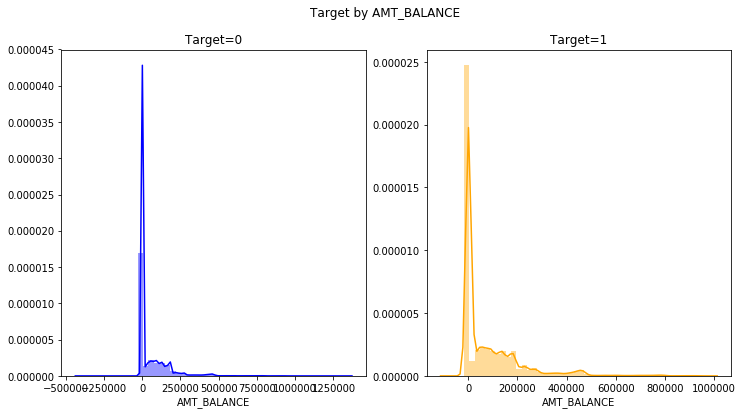

In [24]:
target_hist(ccb, "AMT_BALANCE", "Target by AMT_BALANCE")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="amt-credit-limit-actual"></a>
## AMT_CREDIT_LIMIT_ACTUAL

description : Credit card limit during the month of the previous credit


In [25]:
ccb.AMT_CREDIT_LIMIT_ACTUAL.describe()

count    3.227965e+06
mean     1.529536e+05
std      1.637092e+05
min      0.000000e+00
25%      4.500000e+04
50%      1.125000e+05
75%      1.800000e+05
max      1.350000e+06
Name: AMT_CREDIT_LIMIT_ACTUAL, dtype: float64

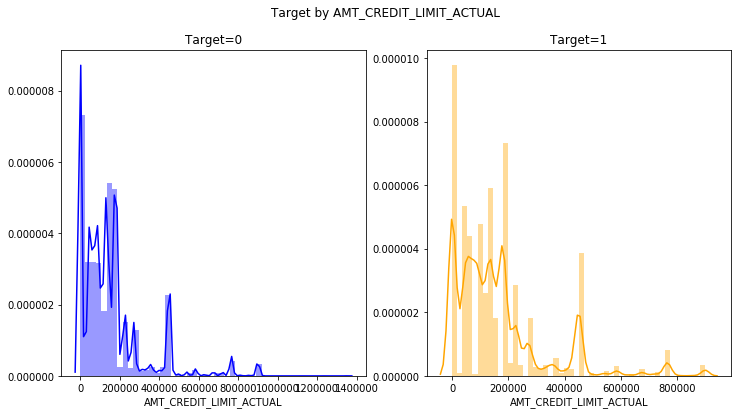

In [26]:
target_hist(ccb, "AMT_CREDIT_LIMIT_ACTUAL", "Target by AMT_CREDIT_LIMIT_ACTUAL")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="amt-drawings-atm-current"></a>
## AMT_DRAWINGS_ATM_CURRENT

description : Amount drawing at ATM during the month of the previous credit

In [27]:
ccb.AMT_DRAWINGS_ATM_CURRENT.describe()

count    2.622211e+06
mean     6.024272e+03
std      2.842116e+04
min     -6.827310e+03
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.115000e+06
Name: AMT_DRAWINGS_ATM_CURRENT, dtype: float64

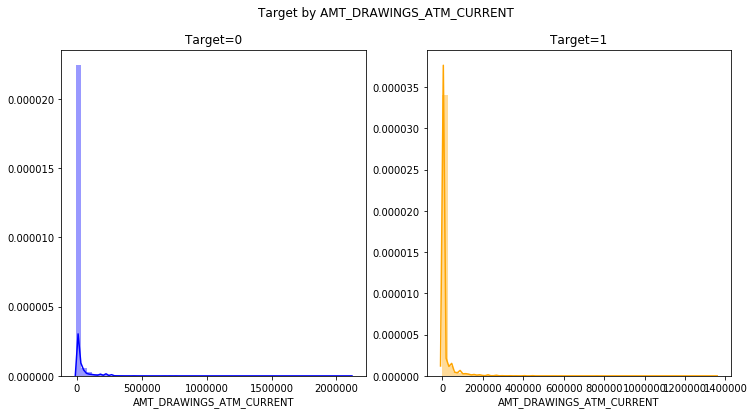

In [28]:
 target_hist(ccb, "AMT_DRAWINGS_ATM_CURRENT", "Target by AMT_DRAWINGS_ATM_CURRENT")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="amt-drawings-current"></a>
## AMT_DRAWINGS_CURRENT

description : Amount drawing during the month of the previous credit

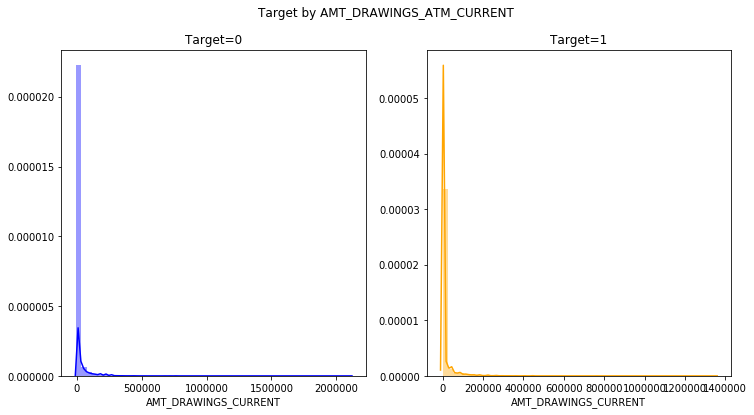

In [29]:
 target_hist(ccb, "AMT_DRAWINGS_CURRENT", "Target by AMT_DRAWINGS_CURRENT")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="amt-drawings-other-current"></a>
## AMT_DRAWINGS_OTHER_CURRENT

description : Amount of other drawings during the month of the previous credit

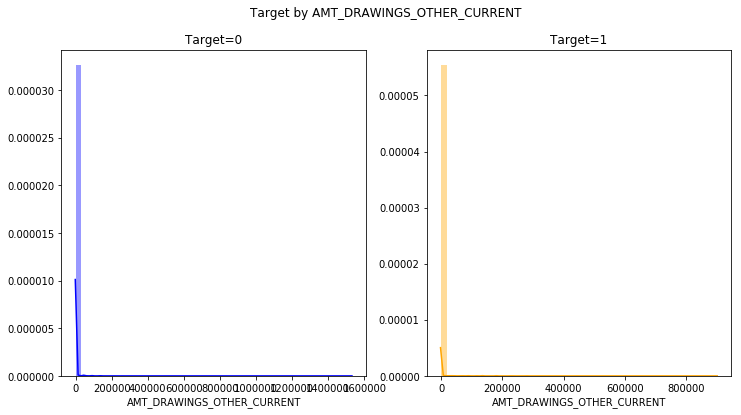

In [30]:
 target_hist(ccb, "AMT_DRAWINGS_OTHER_CURRENT", "Target by AMT_DRAWINGS_OTHER_CURRENT")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="amt-drawings-pos-current"></a>
## AMT_DRAWINGS_POS_CURRENT

description : Amount drawing or buying goods during the month of the previous credit

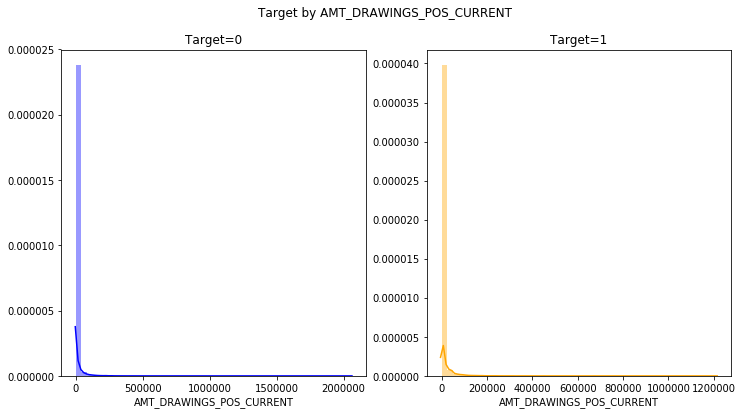

In [31]:
 target_hist(ccb, "AMT_DRAWINGS_POS_CURRENT", "Target by AMT_DRAWINGS_POS_CURRENT")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="amt-inst-min-regularity"></a>
## AMT_INST_MIN_REGULARITY

description : Minimal installment for this month of the previous credit

installment = 分割払いの一回分

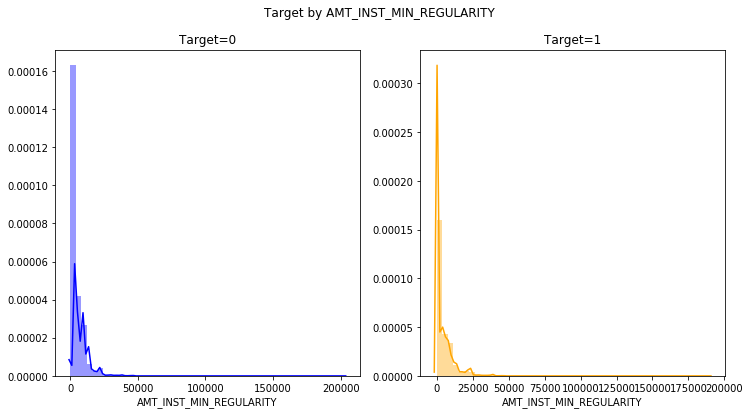

In [32]:
 target_hist(ccb, "AMT_INST_MIN_REGULARITY", "Target by AMT_INST_MIN_REGULARITY")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="amt-payment-current"></a>
## AMT_PAYMENT_CURRENT

description : How much did the client pay during the month on the previous credit

In [34]:
ccb.AMT_PAYMENT_CURRENT.describe()

count    2.607872e+06
mean     1.023861e+04
std      3.586433e+04
min      0.000000e+00
25%      1.557000e+02
50%      2.923020e+03
75%      9.000000e+03
max      4.289207e+06
Name: AMT_PAYMENT_CURRENT, dtype: float64

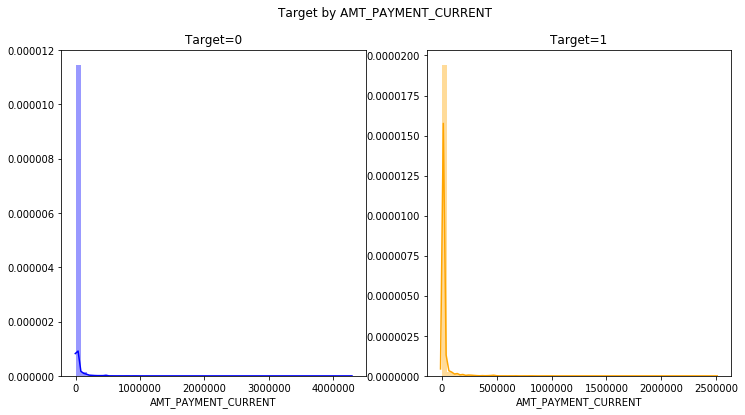

In [33]:
 target_hist(ccb, "AMT_PAYMENT_CURRENT", "Target by AMT_PAYMENT_CURRENT")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="amt-payment-total-current"></a>
## AMT_PAYMENT_TOTAL_CURRENT

description : How much did the client pay during the month in total on the previous credit

In [36]:
ccb.AMT_PAYMENT_TOTAL_CURRENT.describe()

count    3.227965e+06
mean     7.633469e+03
std      3.195403e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.750000e+03
max      4.278316e+06
Name: AMT_PAYMENT_TOTAL_CURRENT, dtype: float64

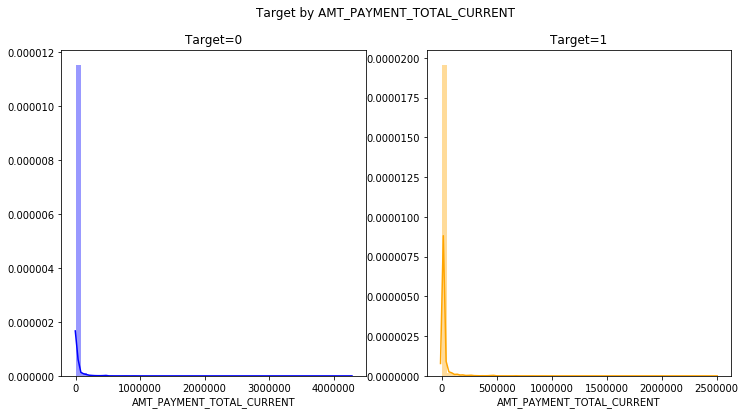

In [35]:
 target_hist(ccb, "AMT_PAYMENT_TOTAL_CURRENT", "Target by AMT_PAYMENT_TOTAL_CURRENT")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="amt-receivable-principal"></a>
## AMT_RECEIVABLE_PRINCIPAL

principal = 元本

元本残高的なものだと思われ

description : Amount receivable for principal on the previous credit

In [37]:
ccb.AMT_RECEIVABLE_PRINCIPAL.describe()

count    3.227965e+06
mean     5.670018e+04
std      1.028242e+05
min     -4.233058e+05
25%      0.000000e+00
50%      0.000000e+00
75%      8.664215e+04
max      1.354829e+06
Name: AMT_RECEIVABLE_PRINCIPAL, dtype: float64

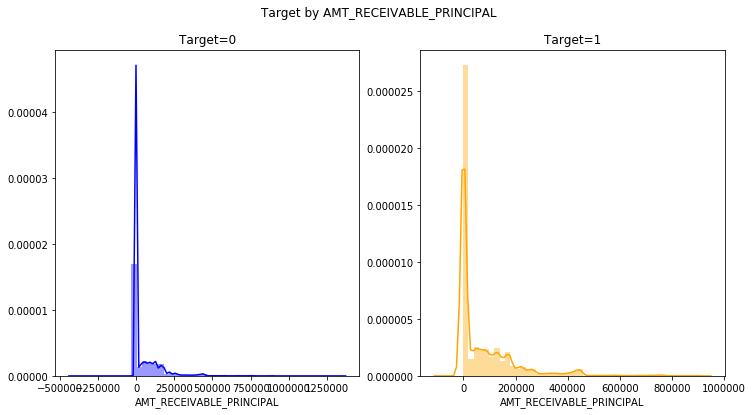

In [38]:
 target_hist(ccb, "AMT_RECEIVABLE_PRINCIPAL", "Target by AMT_RECEIVABLE_PRINCIPAL")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="amt-receivable"></a>
## AMT_RECIVABLE

description : Amount receivable on the previous credit

In [40]:
ccb.AMT_RECIVABLE.describe()

count    3.227965e+06
mean     5.886264e+04
std      1.062747e+05
min     -4.202502e+05
25%      0.000000e+00
50%      0.000000e+00
75%      9.020840e+04
max      1.354829e+06
Name: AMT_RECIVABLE, dtype: float64

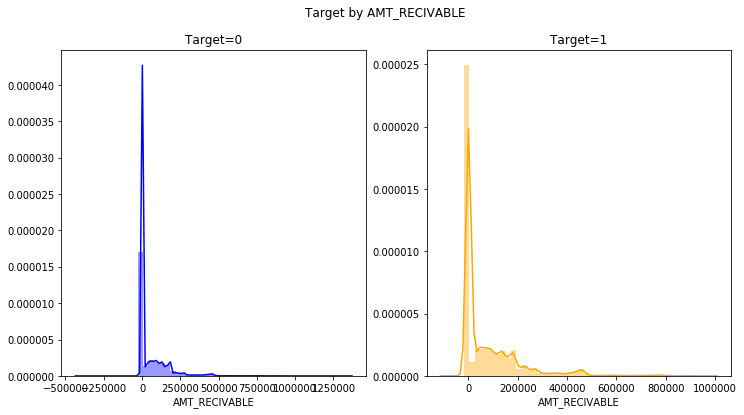

In [41]:
 target_hist(ccb, "AMT_RECIVABLE", "Target by AMT_RECIVABLE")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="amt-total-receivable"></a>
## AMT_TOTAL_RECEIVABLE

description : Total amount receivable on the previous credit

In [42]:
ccb.AMT_TOTAL_RECEIVABLE.describe()

count    3.227965e+06
mean     5.887259e+04
std      1.062813e+05
min     -4.202502e+05
25%      0.000000e+00
50%      0.000000e+00
75%      9.022635e+04
max      1.354829e+06
Name: AMT_TOTAL_RECEIVABLE, dtype: float64

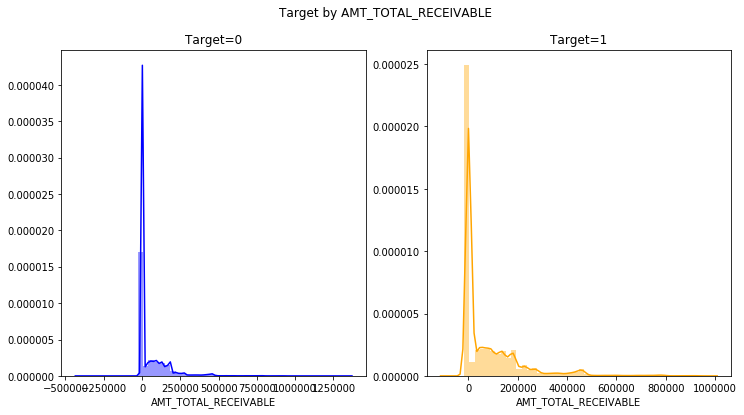

In [43]:
target_hist(ccb, "AMT_TOTAL_RECEIVABLE", "Target by AMT_TOTAL_RECEIVABLE")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="cnt-drawings-atm-current"></a>
## CNT_DRAWINGS_ATM_CURRENT

description : Number of drawings at ATM during this month on the previous credit

In [46]:
ccb.CNT_DRAWINGS_ATM_CURRENT.describe()

count    2.622211e+06
mean     3.150212e-01
std      1.112726e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.100000e+01
Name: CNT_DRAWINGS_ATM_CURRENT, dtype: float64

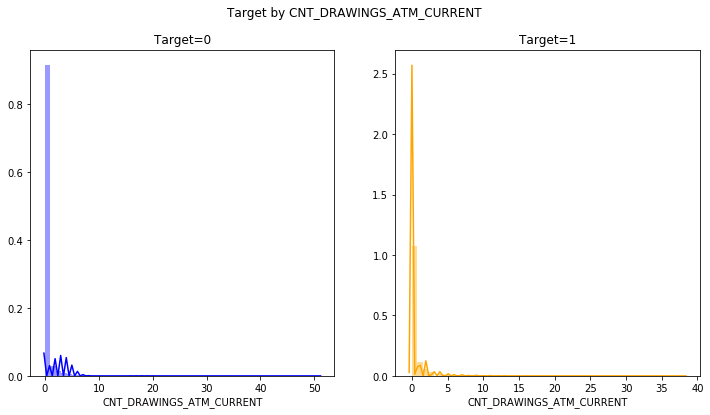

In [47]:
target_hist(ccb, "CNT_DRAWINGS_ATM_CURRENT", "Target by CNT_DRAWINGS_ATM_CURRENT")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="cnt-drawings-current"></a>
## CNT_DRAWINGS_CURRENT

description : Number of drawings during this month on the previous credit

In [51]:
ccb.CNT_DRAWINGS_CURRENT.describe()

count    3.227965e+06
mean     7.011439e-01
std      3.171833e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.650000e+02
Name: CNT_DRAWINGS_CURRENT, dtype: float64

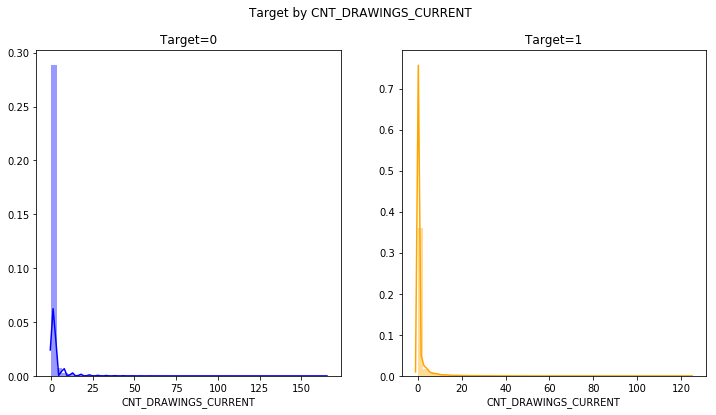

In [50]:
target_hist(ccb, "CNT_DRAWINGS_CURRENT", "Target by CNT_DRAWINGS_CURRENT")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="cnt-drawings-other-current"></a>
## CNT_DRAWINGS_OTHER_CURRENT

description : Number of other drawings during this month on the previous credit

In [53]:
ccb.CNT_DRAWINGS_OTHER_CURRENT.describe()

count    2.622211e+06
mean     4.988538e-03
std      8.408493e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.200000e+01
Name: CNT_DRAWINGS_OTHER_CURRENT, dtype: float64

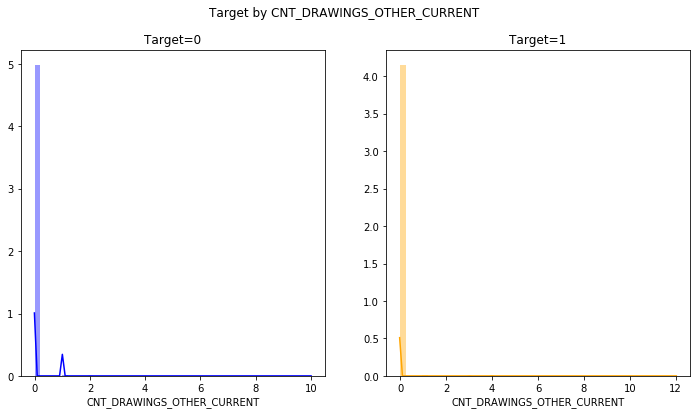

In [52]:
target_hist(ccb, "CNT_DRAWINGS_OTHER_CURRENT", "Target by CNT_DRAWINGS_OTHER_CURRENT")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="cnt-drawings-other-current"></a>
## CNT_DRAWINGS_OTHER_CURRENT

description : Number of drawings for goods during this month on the previous credit

In [54]:
ccb.CNT_DRAWINGS_POS_CURRENT.describe()

count    2.622211e+06
mean     5.431047e-01
std      3.193040e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.650000e+02
Name: CNT_DRAWINGS_POS_CURRENT, dtype: float64

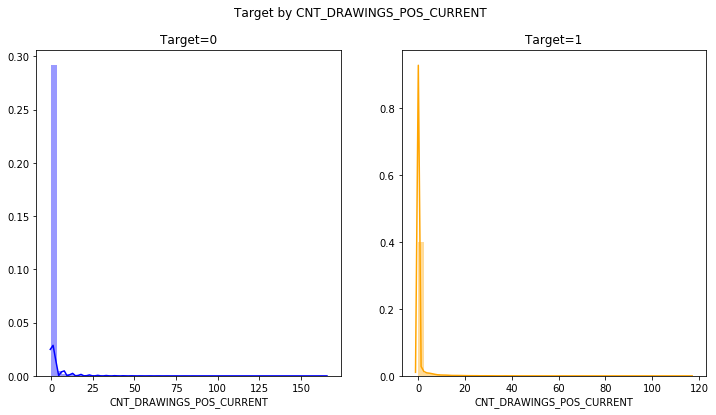

In [55]:
target_hist(ccb, "CNT_DRAWINGS_POS_CURRENT", "Target by CNT_DRAWINGS_POS_CURRENT")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="cnt-instalment-mature-cum"></a>
## CNT_INSTALMENT_MATURE_CUM

description : Number of paid installments on the previous credit

In [56]:
ccb.CNT_INSTALMENT_MATURE_CUM.describe()

count    2.963581e+06
mean     2.108883e+01
std      1.998730e+01
min      0.000000e+00
25%      5.000000e+00
50%      1.600000e+01
75%      3.300000e+01
max      1.200000e+02
Name: CNT_INSTALMENT_MATURE_CUM, dtype: float64

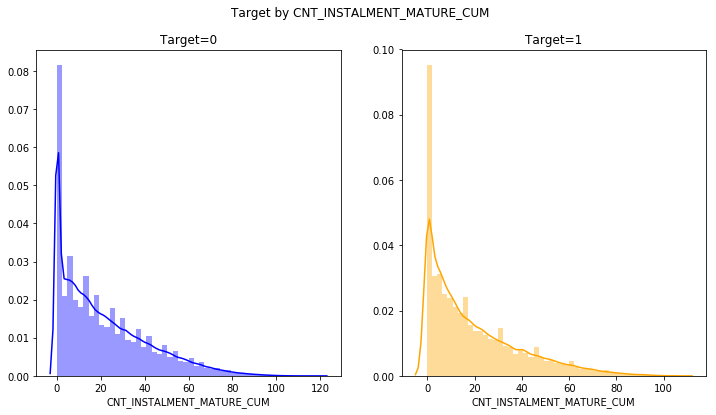

In [57]:
target_hist(ccb, "CNT_INSTALMENT_MATURE_CUM", "Target by CNT_INSTALMENT_MATURE_CUM")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="name-contract-status"></a>
## NAME_CONTRACT_STATUS

description : Contract status (active signed,...) on the previous credit

In [59]:
ccb.NAME_CONTRACT_STATUS.value_counts()

Active           3116673
Completed         100031
Signed              9939
Demand               843
Sent proposal        460
Refused               14
Approved               5
Name: NAME_CONTRACT_STATUS, dtype: int64

/home/sakusaku/anaconda3/envs/py35_cv/lib/python3.5/site-packages/ipykernel_launcher.py:19: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



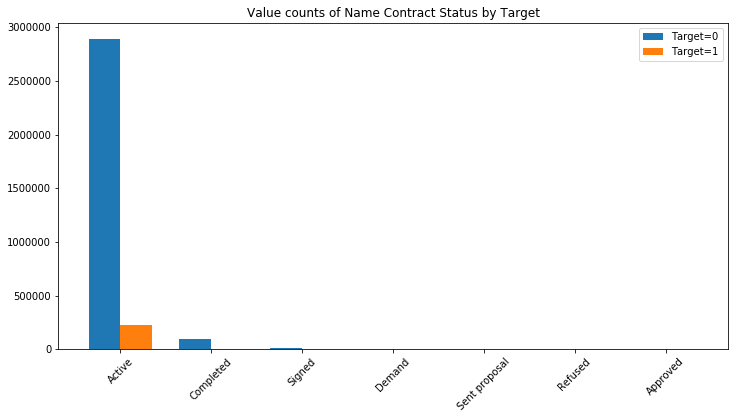

In [60]:
target_bar(ccb, 'NAME_CONTRACT_STATUS', 'Value counts of Name Contract Status by Target')

<div style="text-align: right;">
[back to top](#top)
</div>